In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def calculate_value_np(A, T):
    numerator = 1 - np.exp(-(1 + A) * T)
    denominator = 1 + (1 / A) * np.exp(-(1 + A) * T)
    return numerator / denominator


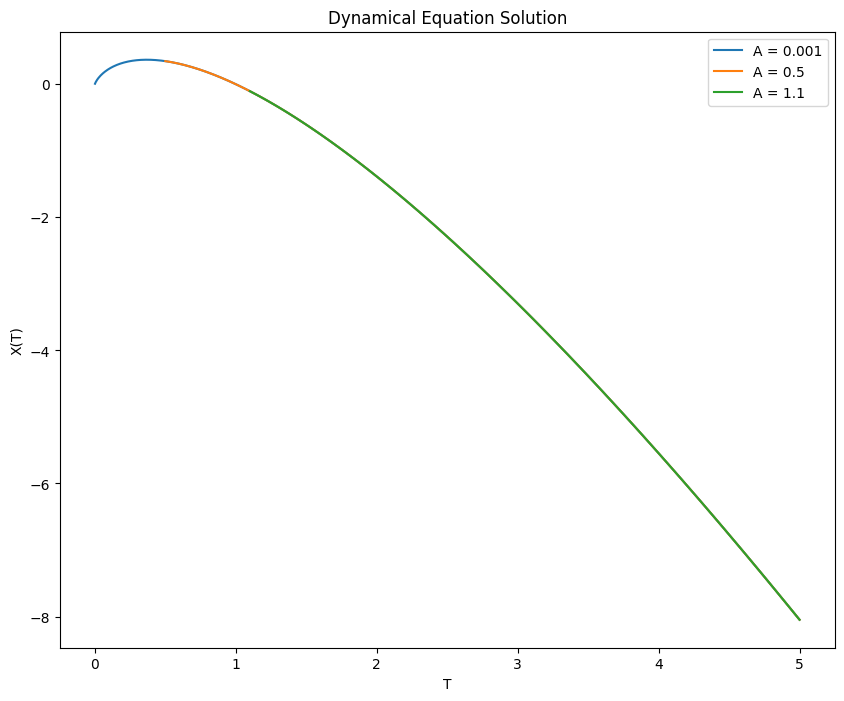

In [15]:
t_values = np.linspace(0, 10, 1000)

A_values = [0.001, 0.5, 1.1]
plt.figure(figsize=(10, 8))

for a in A_values:
    x_values = [0.0001] + [calculate_value_np(a, t) for t in t_values.tolist()[1:]]
    x = np.linspace(a, 5, 1000)
    xdot = (-1)*np.log(x)*x
    plt.plot(x, xdot, label='A = {}'.format(a))

# Plot the solution
plt.xlabel('T')
plt.ylabel('X(T)')
plt.title('Dynamical Equation Solution')
plt.legend()
# plt.grid()
plt.savefig('X(T) vs T.png')

plt.show()


C:\Users\ria31\AppData\Local\Temp\ipykernel_13456\1704856538.py:5: RuntimeWarning: divide by zero encountered in log
  return -a * x * np.log(b * x)
C:\Users\ria31\AppData\Local\Temp\ipykernel_13456\1704856538.py:5: RuntimeWarning: invalid value encountered in multiply
  return -a * x * np.log(b * x)


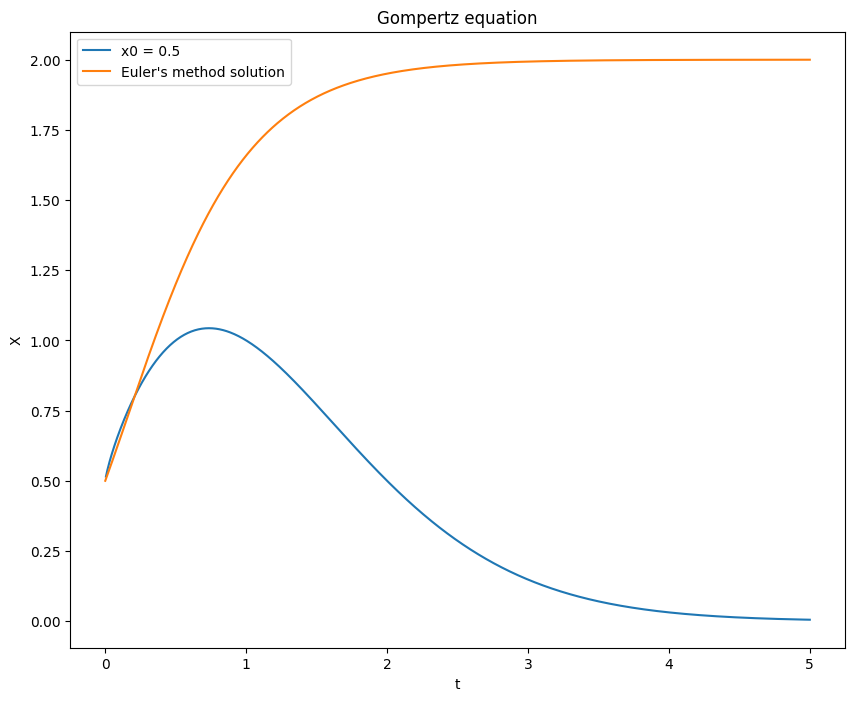

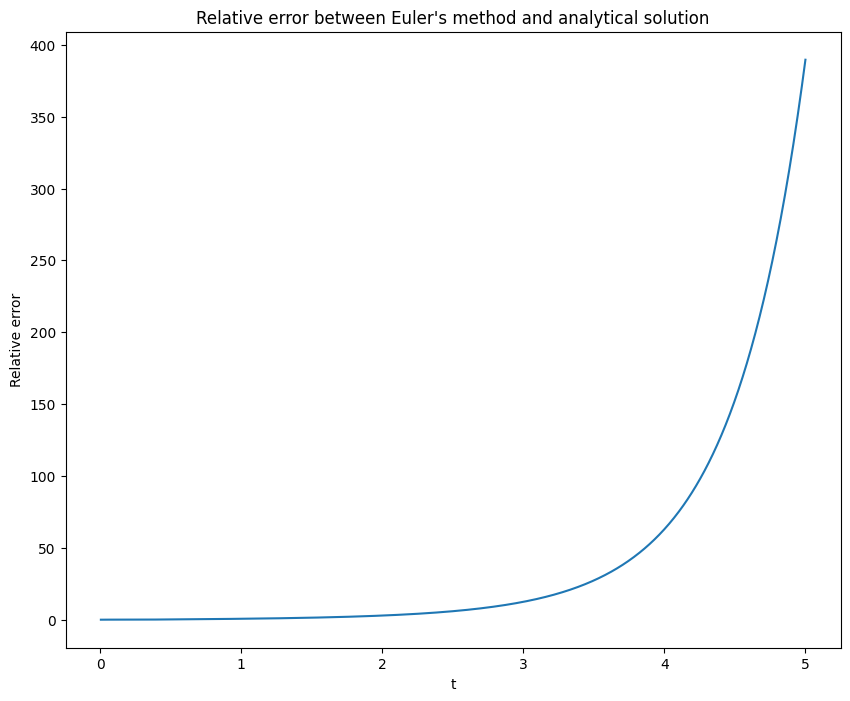

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def gompertz(x, a, b):
  return -a * x * np.log(b * x)

# Parameter values
a = 1.0
b = 0.5

# Initial values
x01 = 0.01
x02 = 1.1
x03 = 0.5

# Time points
t = np.linspace(0, 5, 1000)

# Solutions
X1 = x01 * np.exp(gompertz(t, a, b))
X2 = x02 * np.exp(gompertz(t, a, b))
X3 = x03 * np.exp(gompertz(t, a, b))

# Analytical solution
X_analytical = x03 * np.exp(gompertz(t, a, b))

# Euler's method solution
dt = 0.01
X_euler = np.zeros_like(t)
X_euler[0] = x03
for i in range(1, len(t)):
  X_euler[i] = X_euler[i - 1] + dt * gompertz(X_euler[i - 1], a, b)

# Relative error
error = np.abs(X_euler - X_analytical) / X_analytical

# Plot
plt.figure(figsize=(10, 8))

# plt.plot(t, X1, label=f"x0 = {x01}")
# plt.plot(t, X2, label=f"x0 = {x02}")
plt.plot(t, X3, label=f"x0 = {x03}")
# plt.plot(t, X_analytical, label="Analytical solution")
plt.plot(t, X_euler, label="Euler's method solution")

plt.xlabel("t")
plt.ylabel("X")
plt.title("Gompertz equation")
plt.legend()

# plt.grid(True)

plt.figure(figsize=(10, 8))

plt.plot(t, error)

plt.xlabel("t")
plt.ylabel("Relative error")
plt.title("Relative error between Euler's method and analytical solution")

# plt.grid(True)

plt.show()


In [8]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np 

# Define the Gompertz equation
x = sp.symbols('x')
a, b = sp.symbols('a b', positive=True)
f = -a*x*sp.ln(b*x)

# Rescale the equation
X = x / (1/b)
T = a*t
g = f.subs(x, X).subs(t, T)

# Define three initial values
x01 = 0.1
x02 = np.exp(-0.5)  # Replace sp.E with np.e or sp.exp(1)
x03 = 1.5

# Solve the equation for each initial value
sol1 = sp.dsolve(g.subs(X, x01), ics={x: x01}, t_var=T)
sol2 = sp.dsolve(g.subs(X, x02), ics={x: x02}, t_var=T)
sol3 = sp.dsolve(g.subs(X, x03), ics={x: x03}, t_var=T)

# Extract the numerical solutions
T = sp.linspace(0, 10, 100)
X1 = sp.lambdify(T, sol1.rhs, modules=['numpy'])
X2 = sp.lambdify(T, sol2.rhs, modules=['numpy'])
X3 = sp.lambdify(T, sol3.rhs, modules=['numpy'])

# Plot the solutions
plt.plot(t, X1(t), label=f'X0 = {x01}')
plt.plot(t, X2(t), label=f'X0 = {x02}')
plt.plot(t, X3(t), label=f'X0 = {x03}')

# Add labels and title
plt.xlabel('T')
plt.ylabel('X')
plt.title('Plot of X versus X for different initial values')
plt.legend()

# Show the plot
plt.show()


SympifyError: SympifyError: array([0.        , 0.003003  , 0.00600601, 0.00900901, 0.01201201,
       0.01501502, 0.01801802, 0.02102102, 0.02402402, 0.02702703,
       0.03003003, 0.03303303, 0.03603604, 0.03903904, 0.04204204,
       0.04504505, 0.04804805, 0.05105105, 0.05405405, 0.05705706,
       0.06006006, 0.06306306, 0.06606607, 0.06906907, 0.07207207,
       0.07507508, 0.07807808, 0.08108108, 0.08408408, 0.08708709,
       0.09009009, 0.09309309, 0.0960961 , 0.0990991 , 0.1021021 ,
       0.10510511, 0.10810811, 0.11111111, 0.11411411, 0.11711712,
       0.12012012, 0.12312312, 0.12612613, 0.12912913, 0.13213213,
       0.13513514, 0.13813814, 0.14114114, 0.14414414, 0.14714715,
       0.15015015, 0.15315315, 0.15615616, 0.15915916, 0.16216216,
       0.16516517, 0.16816817, 0.17117117, 0.17417417, 0.17717718,
       0.18018018, 0.18318318, 0.18618619, 0.18918919, 0.19219219,
       0.1951952 , 0.1981982 , 0.2012012 , 0.2042042 , 0.20720721,
       0.21021021, 0.21321321, 0.21621622, 0.21921922, 0.22222222,
       0.22522523, 0.22822823, 0.23123123, 0.23423423, 0.23723724,
       0.24024024, 0.24324324, 0.24624625, 0.24924925, 0.25225225,
       0.25525526, 0.25825826, 0.26126126, 0.26426426, 0.26726727,
       0.27027027, 0.27327327, 0.27627628, 0.27927928, 0.28228228,
       0.28528529, 0.28828829, 0.29129129, 0.29429429, 0.2972973 ,
       0.3003003 , 0.3033033 , 0.30630631, 0.30930931, 0.31231231,
       0.31531532, 0.31831832, 0.32132132, 0.32432432, 0.32732733,
       0.33033033, 0.33333333, 0.33633634, 0.33933934, 0.34234234,
       0.34534535, 0.34834835, 0.35135135, 0.35435435, 0.35735736,
       0.36036036, 0.36336336, 0.36636637, 0.36936937, 0.37237237,
       0.37537538, 0.37837838, 0.38138138, 0.38438438, 0.38738739,
       0.39039039, 0.39339339, 0.3963964 , 0.3993994 , 0.4024024 ,
       0.40540541, 0.40840841, 0.41141141, 0.41441441, 0.41741742,
       0.42042042, 0.42342342, 0.42642643, 0.42942943, 0.43243243,
       0.43543544, 0.43843844, 0.44144144, 0.44444444, 0.44744745,
       0.45045045, 0.45345345, 0.45645646, 0.45945946, 0.46246246,
       0.46546547, 0.46846847, 0.47147147, 0.47447447, 0.47747748,
       0.48048048, 0.48348348, 0.48648649, 0.48948949, 0.49249249,
       0.4954955 , 0.4984985 , 0.5015015 , 0.5045045 , 0.50750751,
       0.51051051, 0.51351351, 0.51651652, 0.51951952, 0.52252252,
       0.52552553, 0.52852853, 0.53153153, 0.53453453, 0.53753754,
       0.54054054, 0.54354354, 0.54654655, 0.54954955, 0.55255255,
       0.55555556, 0.55855856, 0.56156156, 0.56456456, 0.56756757,
       0.57057057, 0.57357357, 0.57657658, 0.57957958, 0.58258258,
       0.58558559, 0.58858859, 0.59159159, 0.59459459, 0.5975976 ,
       0.6006006 , 0.6036036 , 0.60660661, 0.60960961, 0.61261261,
       0.61561562, 0.61861862, 0.62162162, 0.62462462, 0.62762763,
       0.63063063, 0.63363363, 0.63663664, 0.63963964, 0.64264264,
       0.64564565, 0.64864865, 0.65165165, 0.65465465, 0.65765766,
       0.66066066, 0.66366366, 0.66666667, 0.66966967, 0.67267267,
       0.67567568, 0.67867868, 0.68168168, 0.68468468, 0.68768769,
       0.69069069, 0.69369369, 0.6966967 , 0.6996997 , 0.7027027 ,
       0.70570571, 0.70870871, 0.71171171, 0.71471471, 0.71771772,
       0.72072072, 0.72372372, 0.72672673, 0.72972973, 0.73273273,
       0.73573574, 0.73873874, 0.74174174, 0.74474474, 0.74774775,
       0.75075075, 0.75375375, 0.75675676, 0.75975976, 0.76276276,
       0.76576577, 0.76876877, 0.77177177, 0.77477477, 0.77777778,
       0.78078078, 0.78378378, 0.78678679, 0.78978979, 0.79279279,
       0.7957958 , 0.7987988 , 0.8018018 , 0.8048048 , 0.80780781,
       0.81081081, 0.81381381, 0.81681682, 0.81981982, 0.82282282,
       0.82582583, 0.82882883, 0.83183183, 0.83483483, 0.83783784,
       0.84084084, 0.84384384, 0.84684685, 0.84984985, 0.85285285,
       0.85585586, 0.85885886, 0.86186186, 0.86486486, 0.86786787,
       0.87087087, 0.87387387, 0.87687688, 0.87987988, 0.88288288,
       0.88588589, 0.88888889, 0.89189189, 0.89489489, 0.8978979 ,
       0.9009009 , 0.9039039 , 0.90690691, 0.90990991, 0.91291291,
       0.91591592, 0.91891892, 0.92192192, 0.92492492, 0.92792793,
       0.93093093, 0.93393393, 0.93693694, 0.93993994, 0.94294294,
       0.94594595, 0.94894895, 0.95195195, 0.95495495, 0.95795796,
       0.96096096, 0.96396396, 0.96696697, 0.96996997, 0.97297297,
       0.97597598, 0.97897898, 0.98198198, 0.98498498, 0.98798799,
       0.99099099, 0.99399399, 0.996997  , 1.        , 1.003003  ,
       1.00600601, 1.00900901, 1.01201201, 1.01501502, 1.01801802,
       1.02102102, 1.02402402, 1.02702703, 1.03003003, 1.03303303,
       1.03603604, 1.03903904, 1.04204204, 1.04504505, 1.04804805,
       1.05105105, 1.05405405, 1.05705706, 1.06006006, 1.06306306,
       1.06606607, 1.06906907, 1.07207207, 1.07507508, 1.07807808,
       1.08108108, 1.08408408, 1.08708709, 1.09009009, 1.09309309,
       1.0960961 , 1.0990991 , 1.1021021 , 1.10510511, 1.10810811,
       1.11111111, 1.11411411, 1.11711712, 1.12012012, 1.12312312,
       1.12612613, 1.12912913, 1.13213213, 1.13513514, 1.13813814,
       1.14114114, 1.14414414, 1.14714715, 1.15015015, 1.15315315,
       1.15615616, 1.15915916, 1.16216216, 1.16516517, 1.16816817,
       1.17117117, 1.17417417, 1.17717718, 1.18018018, 1.18318318,
       1.18618619, 1.18918919, 1.19219219, 1.1951952 , 1.1981982 ,
       1.2012012 , 1.2042042 , 1.20720721, 1.21021021, 1.21321321,
       1.21621622, 1.21921922, 1.22222222, 1.22522523, 1.22822823,
       1.23123123, 1.23423423, 1.23723724, 1.24024024, 1.24324324,
       1.24624625, 1.24924925, 1.25225225, 1.25525526, 1.25825826,
       1.26126126, 1.26426426, 1.26726727, 1.27027027, 1.27327327,
       1.27627628, 1.27927928, 1.28228228, 1.28528529, 1.28828829,
       1.29129129, 1.29429429, 1.2972973 , 1.3003003 , 1.3033033 ,
       1.30630631, 1.30930931, 1.31231231, 1.31531532, 1.31831832,
       1.32132132, 1.32432432, 1.32732733, 1.33033033, 1.33333333,
       1.33633634, 1.33933934, 1.34234234, 1.34534535, 1.34834835,
       1.35135135, 1.35435435, 1.35735736, 1.36036036, 1.36336336,
       1.36636637, 1.36936937, 1.37237237, 1.37537538, 1.37837838,
       1.38138138, 1.38438438, 1.38738739, 1.39039039, 1.39339339,
       1.3963964 , 1.3993994 , 1.4024024 , 1.40540541, 1.40840841,
       1.41141141, 1.41441441, 1.41741742, 1.42042042, 1.42342342,
       1.42642643, 1.42942943, 1.43243243, 1.43543544, 1.43843844,
       1.44144144, 1.44444444, 1.44744745, 1.45045045, 1.45345345,
       1.45645646, 1.45945946, 1.46246246, 1.46546547, 1.46846847,
       1.47147147, 1.47447447, 1.47747748, 1.48048048, 1.48348348,
       1.48648649, 1.48948949, 1.49249249, 1.4954955 , 1.4984985 ,
       1.5015015 , 1.5045045 , 1.50750751, 1.51051051, 1.51351351,
       1.51651652, 1.51951952, 1.52252252, 1.52552553, 1.52852853,
       1.53153153, 1.53453453, 1.53753754, 1.54054054, 1.54354354,
       1.54654655, 1.54954955, 1.55255255, 1.55555556, 1.55855856,
       1.56156156, 1.56456456, 1.56756757, 1.57057057, 1.57357357,
       1.57657658, 1.57957958, 1.58258258, 1.58558559, 1.58858859,
       1.59159159, 1.59459459, 1.5975976 , 1.6006006 , 1.6036036 ,
       1.60660661, 1.60960961, 1.61261261, 1.61561562, 1.61861862,
       1.62162162, 1.62462462, 1.62762763, 1.63063063, 1.63363363,
       1.63663664, 1.63963964, 1.64264264, 1.64564565, 1.64864865,
       1.65165165, 1.65465465, 1.65765766, 1.66066066, 1.66366366,
       1.66666667, 1.66966967, 1.67267267, 1.67567568, 1.67867868,
       1.68168168, 1.68468468, 1.68768769, 1.69069069, 1.69369369,
       1.6966967 , 1.6996997 , 1.7027027 , 1.70570571, 1.70870871,
       1.71171171, 1.71471471, 1.71771772, 1.72072072, 1.72372372,
       1.72672673, 1.72972973, 1.73273273, 1.73573574, 1.73873874,
       1.74174174, 1.74474474, 1.74774775, 1.75075075, 1.75375375,
       1.75675676, 1.75975976, 1.76276276, 1.76576577, 1.76876877,
       1.77177177, 1.77477477, 1.77777778, 1.78078078, 1.78378378,
       1.78678679, 1.78978979, 1.79279279, 1.7957958 , 1.7987988 ,
       1.8018018 , 1.8048048 , 1.80780781, 1.81081081, 1.81381381,
       1.81681682, 1.81981982, 1.82282282, 1.82582583, 1.82882883,
       1.83183183, 1.83483483, 1.83783784, 1.84084084, 1.84384384,
       1.84684685, 1.84984985, 1.85285285, 1.85585586, 1.85885886,
       1.86186186, 1.86486486, 1.86786787, 1.87087087, 1.87387387,
       1.87687688, 1.87987988, 1.88288288, 1.88588589, 1.88888889,
       1.89189189, 1.89489489, 1.8978979 , 1.9009009 , 1.9039039 ,
       1.90690691, 1.90990991, 1.91291291, 1.91591592, 1.91891892,
       1.92192192, 1.92492492, 1.92792793, 1.93093093, 1.93393393,
       1.93693694, 1.93993994, 1.94294294, 1.94594595, 1.94894895,
       1.95195195, 1.95495495, 1.95795796, 1.96096096, 1.96396396,
       1.96696697, 1.96996997, 1.97297297, 1.97597598, 1.97897898,
       1.98198198, 1.98498498, 1.98798799, 1.99099099, 1.99399399,
       1.996997  , 2.        , 2.003003  , 2.00600601, 2.00900901,
       2.01201201, 2.01501502, 2.01801802, 2.02102102, 2.02402402,
       2.02702703, 2.03003003, 2.03303303, 2.03603604, 2.03903904,
       2.04204204, 2.04504505, 2.04804805, 2.05105105, 2.05405405,
       2.05705706, 2.06006006, 2.06306306, 2.06606607, 2.06906907,
       2.07207207, 2.07507508, 2.07807808, 2.08108108, 2.08408408,
       2.08708709, 2.09009009, 2.09309309, 2.0960961 , 2.0990991 ,
       2.1021021 , 2.10510511, 2.10810811, 2.11111111, 2.11411411,
       2.11711712, 2.12012012, 2.12312312, 2.12612613, 2.12912913,
       2.13213213, 2.13513514, 2.13813814, 2.14114114, 2.14414414,
       2.14714715, 2.15015015, 2.15315315, 2.15615616, 2.15915916,
       2.16216216, 2.16516517, 2.16816817, 2.17117117, 2.17417417,
       2.17717718, 2.18018018, 2.18318318, 2.18618619, 2.18918919,
       2.19219219, 2.1951952 , 2.1981982 , 2.2012012 , 2.2042042 ,
       2.20720721, 2.21021021, 2.21321321, 2.21621622, 2.21921922,
       2.22222222, 2.22522523, 2.22822823, 2.23123123, 2.23423423,
       2.23723724, 2.24024024, 2.24324324, 2.24624625, 2.24924925,
       2.25225225, 2.25525526, 2.25825826, 2.26126126, 2.26426426,
       2.26726727, 2.27027027, 2.27327327, 2.27627628, 2.27927928,
       2.28228228, 2.28528529, 2.28828829, 2.29129129, 2.29429429,
       2.2972973 , 2.3003003 , 2.3033033 , 2.30630631, 2.30930931,
       2.31231231, 2.31531532, 2.31831832, 2.32132132, 2.32432432,
       2.32732733, 2.33033033, 2.33333333, 2.33633634, 2.33933934,
       2.34234234, 2.34534535, 2.34834835, 2.35135135, 2.35435435,
       2.35735736, 2.36036036, 2.36336336, 2.36636637, 2.36936937,
       2.37237237, 2.37537538, 2.37837838, 2.38138138, 2.38438438,
       2.38738739, 2.39039039, 2.39339339, 2.3963964 , 2.3993994 ,
       2.4024024 , 2.40540541, 2.40840841, 2.41141141, 2.41441441,
       2.41741742, 2.42042042, 2.42342342, 2.42642643, 2.42942943,
       2.43243243, 2.43543544, 2.43843844, 2.44144144, 2.44444444,
       2.44744745, 2.45045045, 2.45345345, 2.45645646, 2.45945946,
       2.46246246, 2.46546547, 2.46846847, 2.47147147, 2.47447447,
       2.47747748, 2.48048048, 2.48348348, 2.48648649, 2.48948949,
       2.49249249, 2.4954955 , 2.4984985 , 2.5015015 , 2.5045045 ,
       2.50750751, 2.51051051, 2.51351351, 2.51651652, 2.51951952,
       2.52252252, 2.52552553, 2.52852853, 2.53153153, 2.53453453,
       2.53753754, 2.54054054, 2.54354354, 2.54654655, 2.54954955,
       2.55255255, 2.55555556, 2.55855856, 2.56156156, 2.56456456,
       2.56756757, 2.57057057, 2.57357357, 2.57657658, 2.57957958,
       2.58258258, 2.58558559, 2.58858859, 2.59159159, 2.59459459,
       2.5975976 , 2.6006006 , 2.6036036 , 2.60660661, 2.60960961,
       2.61261261, 2.61561562, 2.61861862, 2.62162162, 2.62462462,
       2.62762763, 2.63063063, 2.63363363, 2.63663664, 2.63963964,
       2.64264264, 2.64564565, 2.64864865, 2.65165165, 2.65465465,
       2.65765766, 2.66066066, 2.66366366, 2.66666667, 2.66966967,
       2.67267267, 2.67567568, 2.67867868, 2.68168168, 2.68468468,
       2.68768769, 2.69069069, 2.69369369, 2.6966967 , 2.6996997 ,
       2.7027027 , 2.70570571, 2.70870871, 2.71171171, 2.71471471,
       2.71771772, 2.72072072, 2.72372372, 2.72672673, 2.72972973,
       2.73273273, 2.73573574, 2.73873874, 2.74174174, 2.74474474,
       2.74774775, 2.75075075, 2.75375375, 2.75675676, 2.75975976,
       2.76276276, 2.76576577, 2.76876877, 2.77177177, 2.77477477,
       2.77777778, 2.78078078, 2.78378378, 2.78678679, 2.78978979,
       2.79279279, 2.7957958 , 2.7987988 , 2.8018018 , 2.8048048 ,
       2.80780781, 2.81081081, 2.81381381, 2.81681682, 2.81981982,
       2.82282282, 2.82582583, 2.82882883, 2.83183183, 2.83483483,
       2.83783784, 2.84084084, 2.84384384, 2.84684685, 2.84984985,
       2.85285285, 2.85585586, 2.85885886, 2.86186186, 2.86486486,
       2.86786787, 2.87087087, 2.87387387, 2.87687688, 2.87987988,
       2.88288288, 2.88588589, 2.88888889, 2.89189189, 2.89489489,
       2.8978979 , 2.9009009 , 2.9039039 , 2.90690691, 2.90990991,
       2.91291291, 2.91591592, 2.91891892, 2.92192192, 2.92492492,
       2.92792793, 2.93093093, 2.93393393, 2.93693694, 2.93993994,
       2.94294294, 2.94594595, 2.94894895, 2.95195195, 2.95495495,
       2.95795796, 2.96096096, 2.96396396, 2.96696697, 2.96996997,
       2.97297297, 2.97597598, 2.97897898, 2.98198198, 2.98498498,
       2.98798799, 2.99099099, 2.99399399, 2.996997  , 3.        ])

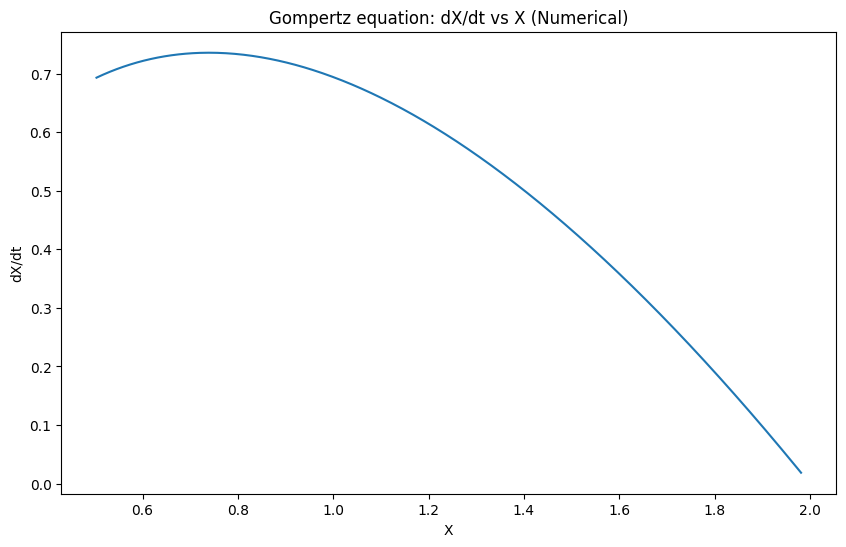

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def gompertz(x, a, b):
  return -a * x * np.log(b * x)

# Parameter values
a = 1.0
b = 0.5

# Initial value
x0 = 0.5

# Time points
t = np.linspace(0, 5, 1000)
dt = t[1] - t[0]  # Calculate time step

# Euler's method solution
dt = 0.01
X_euler = np.zeros_like(t)
X_euler[0] = x03
for i in range(1, len(t)):
  X_euler[i] = X_euler[i - 1] + dt * gompertz(X_euler[i - 1], a, b)

# Relative error
error = np.abs(X_euler - X_analytical) / X_analytical

# Plot
plt.figure(figsize=(10, 8))

# plt.plot(t, X1, label=f"x0 = {x01}")
# plt.plot(t, X2, label=f"x0 = {x02}")
plt.plot(t, X3, label=f"x0 = {x03}")
# plt.plot(t, X_analytical, label="Analytical solution")
plt.plot(t, X_euler, label="Euler's method solution")

# Solve numerically (using Euler's method for simplicity)
X = np.zeros_like(t)
X[0] = x0
for i in range(1, len(t)):
    dXdt = gompertz(X[i-1], a, b)
    X[i] = X[i-1] + dXdt * dt 

# Approximate dx/dt using forward differences
dXdt_approx = (X[1:] - X[:-1]) / dt

# Plot dx/dt vs X (excluding the first point due to forward difference)
plt.figure(figsize=(10, 6))
plt.plot(X[1:], dXdt_approx) 
plt.xlabel("X")
plt.ylabel("dX/dt")
plt.title("Gompertz equation: dX/dt vs X (Numerical)")
# plt.grid(True)
plt.show()
